# Update/change an existing target

Sometime, you don't want to use the pre-defined targets as given. You may want to change the model function parameters (the `kwargs`) or even the function (the `func`) used to draw the target's parameters. 

You can do that while calling `draw()`, `from_draw()` or simply using `update_model()`. 

Let's see the differences.

***
## Changing model entry's parameters

This is the simplest and the most commun usage. 

You want to change the model's parameters. You can do that using `**kwargs` of `draw()` (`from_draw()`) method, with the format:
```python
{entry_name: dict}
```


For instance, let's change the **alpha** and **beta** parameters of the SNeIa model ; these are parameters of the **magabs** function (see, `skysurvey.target.snia.SNeIaMagnitude.tripp1998`):

In [24]:
import skysurvey

snia = skysurvey.SNeIa.from_draw(size=1_000, 
                                 magabs={"alpha":-0.15, "beta":3.8} # kwargs here
                                )
snia.data

,z,x1,c,t0,magabs,magobs,x0,ra,dec,template
0,0.1795,0.625,-0.012,56048.535156,-19.420927,20.344774,0.000116,150.139282,-5.958224,salt2
1,0.1985,0.665,0.094,56177.761719,-18.835100,21.173206,0.000054,273.204529,-5.637442,salt2
2,0.0915,0.645,0.077,56031.519531,-18.976067,19.205963,0.000330,352.532471,81.346268,salt2
3,0.1205,-1.835,0.064,56058.148438,-18.713734,20.107481,0.000144,131.439423,-48.628906,salt2
4,0.1415,-0.800,0.250,56039.902344,-18.093487,21.105480,0.000057,175.672821,1.257089,salt2
...,...,...,...,...,...,...,...,...,...,...
995,0.1335,1.260,0.003,56114.656250,-19.543327,19.518353,0.000247,206.876236,50.277973,salt2
996,0.1295,-2.130,-0.046,56025.613281,-19.364727,19.625395,0.000224,348.446777,47.212788,salt2
997,0.1685,-1.165,-0.084,56107.847656,-19.506569,20.107552,0.000144,79.449783,7.230572,salt2
998,0.1325,-1.375,0.054,56113.195312,-18.827452,20.216530,0.000130,115.708275,21.965523,salt2


**Using `kwargs` does not update the actual instance's model, but simply what is used to draw the data**

Consequently, so the ``model`` itself is not changed.

In [25]:
snia.model

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x294a161f0>},
 'c': {'func': <function SNeIaColor.intrinsic_and_dust at 0x294a16160>},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1063e1640>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x294a16280>,
            'kwargs': {'x1': '@x1', 'c': '@c', 'mabs': -19.3, 'sigmaint': 0.1}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x16c714160>,
           'kwargs': {},
           'as': ['ra', 'dec']}}

### how to permanently change instance's model parameters ?

To permanently change the model of the instance, you need to use ``self.update_model_parameter()``

In [3]:
snia.update_model_parameter(magabs={"alpha":-0.15, "beta":3.8} )
snia.model

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x294a161f0>},
 'c': {'func': <function SNeIaColor.intrinsic_and_dust at 0x294a16160>},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1063e1640>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x294a16280>,
            'kwargs': {'x1': '@x1',
                       'c': '@c',
                       'mabs': -19.3,
                       'sigmaint': 0.1,
                       'alpha': -0.15,
                       'beta': 3.8}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x16c714160>,
           'kwargs': {},
           'as': ['ra', 'dec']}}

***
## Changing model entry's (`func` and `kwargs`)

You can also change the way a parameter is drawn, not just it's function parameters.

To do so, you need to update `func` and provide its new `kwargs` (if any). This means, updating the `model` for the entry.

To do that, you can use:
- the **model** option in `draw()`: this will update the model used to draw but will not affect the actual instance's model
- the **model** option in `from_draw()`: this changes the model while creating the instance, it is thus permanent 
- the `update_model()` method: this is permanent (it is what `from_draw()` uses).

The format is that of a model (see [modelDAG](https://modeldag.readthedocs.io/en/latest/)):
```python
{entry_name: {"func": a_function, ["kwargs": dict, "as": string_or_list]}}
```


For instance, say we want to change how the **c** parameter is drawn, we want to use a uniform distribution between -1 and +3: 

In [26]:
import numpy as np
new_model_for_c = {"c": {"func": np.random.uniform, "kwargs": {"low":-1, "high":+3}}}

In [27]:
snia = skysurvey.SNeIa.from_draw(size=1_000, 
                                 model=new_model_for_c
                                )


<Axes: ylabel='Frequency'>

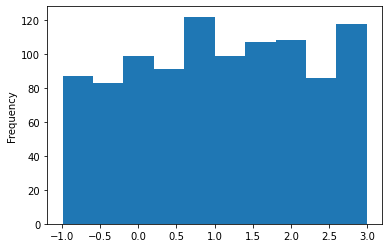

In [28]:
snia.data["c"].plot.hist()

**here, the change is permanent, as you changed the model used to load the instance**

In [29]:
snia.model # check-out the c-entry

{'redshift': {'kwargs': {'zmax': 0.2}, 'as': 'z'},
 'x1': {'func': <function SNeIaStretch.nicolas2021 at 0x294a161f0>},
 'c': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1063e1640>,
       'kwargs': {'low': -1, 'high': 3}},
 't0': {'func': <built-in method uniform of numpy.random.mtrand.RandomState object at 0x1063e1640>,
        'kwargs': {'low': 56000, 'high': 56200}},
 'magabs': {'func': <function SNeIaMagnitude.tripp1998 at 0x294a16280>,
            'kwargs': {'x1': '@x1', 'c': '@c', 'mabs': -19.3, 'sigmaint': 0.1}},
 'magobs': {'func': 'magabs_to_magobs',
            'kwargs': {'z': '@z', 'magabs': '@magabs'}},
 'x0': {'func': 'magobs_to_amplitude',
        'kwargs': {'magobs': '@magobs', 'param_name': 'x0'}},
 'radec': {'func': <function random_radec at 0x16c714160>,
           'kwargs': {},
           'as': ['ra', 'dec']}}

to change the model only for a `draw()` call

In [30]:
snia = skysurvey.SNeIa()
data_updated = snia.draw(size=1_000, model=new_model_for_c)
data_not_updated = snia.draw(size=1_000)

<Axes: ylabel='Frequency'>

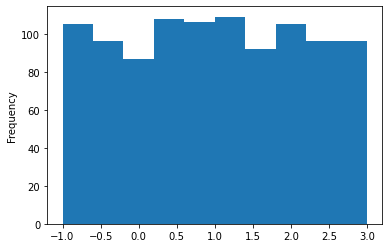

In [32]:
data_updated["c"].plot.hist()

<Axes: ylabel='Frequency'>

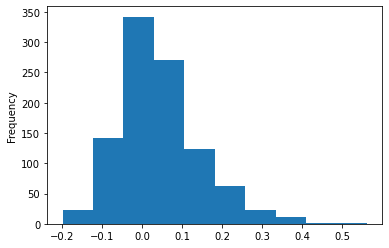

In [33]:
data_not_updated["c"].plot.hist()

### use `update_model()`

you can directly change (permanently) the model using update_model

In [34]:
flat_model = {"c": {"func": np.random.uniform, "kwargs": {"low":-0.1, "high":+1}},
              "x1": {"func": np.random.uniform, "kwargs": {"low":-3, "high":+3}}
             }

snia = skysurvey.SNeIa()
snia.update_model(**flat_model)
data = snia.draw(1_000)

In [23]:
data

,z,x1,c,t0,magabs,magobs,x0,ra,dec
0,0.0745,2.085478,0.123513,56060.344394,-19.241942,18.468710,0.000650,82.838320,47.200583
1,0.0805,-2.025811,0.433947,56015.415034,-17.655552,20.232211,0.000128,161.117479,-37.949688
2,0.1065,0.807496,0.332289,56097.928460,-18.323621,20.209656,0.000131,11.324980,-28.978693
3,0.1555,-2.034821,0.016078,56158.402271,-18.965969,20.456669,0.000104,236.731620,4.145109
4,0.0795,-0.781528,0.513631,56175.316082,-17.702513,20.156626,0.000137,59.901789,72.593947
...,...,...,...,...,...,...,...,...,...
995,0.1515,-2.396482,0.249506,56127.273247,-18.044146,21.316569,0.000047,203.948231,-34.998608
996,0.1305,-1.267226,0.390439,56072.642337,-17.709347,21.298857,0.000048,144.105919,0.309306
997,0.1985,2.901974,0.340106,56189.542496,-18.551960,21.456346,0.000042,74.972726,-50.966763
998,0.1215,-1.502519,0.693316,56155.863761,-16.975052,21.865506,0.000028,199.213455,-0.512277


### shall I update a model or create a new one ?

`model` option can **affect any entry**, you can even **add entry**, but any new entry will be appended at the end of the dist model. **So to create an internal dependency, you will need to create a new model from scratch.**


#### For instance, this would not work:

Say you want to randomly draw **beta** from a normal distribution and use this drawn parameter as input of **magabs**


In [36]:
random_beta_model = {"beta": {"func": np.random.normal, "kwargs": {"loc":3.5, "scale":0.1}},
                     "magabs": {"func": skysurvey.target.snia.SNeIaMagnitude.tripp1998,
                                "kwargs": {"x1":"@x1", "c":"@c", "beta":"@beta"}}
                     }

In [37]:
snia = skysurvey.SNeIa()

In [38]:
_ = snia.draw(1_000, model=random_beta_model)

KeyError: 'beta'